# Importing the Libraries

In [1]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.9 MB 32.1 MB/s 
     |████████████████████████████████| 9.9 MB 53.6 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/home/ibrar/Downloads/Microsoft Stock Price prediction'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

from math import floor,ceil,sqrt
import sys
import warnings
import datetime as dt

if not sys.warnoptions:
    warnings.simplefilter("ignore")
from sklearn.linear_model import LinearRegression
from pmdarima.arima import auto_arima
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from prophet import Prophet

from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM


## Download data set of Kaggle from google drive 

In [3]:
!gdown 1-RirY3ludTVrSyonJSJVCt8cMKKhO_DJ

Downloading...
From: https://drive.google.com/uc?id=1-RirY3ludTVrSyonJSJVCt8cMKKhO_DJ
To: /content/Microsoft_Stock.csv
100% 81.7k/81.7k [00:00<00:00, 92.3MB/s]


## Reading CSV file

In [4]:
df = pd.read_csv('/content/Microsoft_Stock.csv')
df.head(10)

,Date,Open,High,Low,Close,Volume
0,4/1/2015 16:00:00,40.60,40.76,40.31,40.72,36865322
1,4/2/2015 16:00:00,40.66,40.74,40.12,40.29,37487476
2,4/6/2015 16:00:00,40.34,41.78,40.18,41.55,39223692
3,4/7/2015 16:00:00,41.61,41.91,41.31,41.53,28809375
4,4/8/2015 16:00:00,41.48,41.69,41.04,41.42,24753438
5,4/9/2015 16:00:00,41.25,41.62,41.25,41.48,25723861
6,4/10/2015 16:00:00,41.63,41.95,41.41,41.72,28022002
7,4/13/2015 16:00:00,41.40,42.06,41.39,41.76,30276692
8,4/14/2015 16:00:00,41.80,42.03,41.39,41.65,24244382
9,4/15/2015 16:00:00,41.76,42.46,41.68,42.26,27343581


## Analyzing Stock Prices of Microsft over the Years

Text(0.5, 1.0, 'Stock Price of Microsoft over the Years')

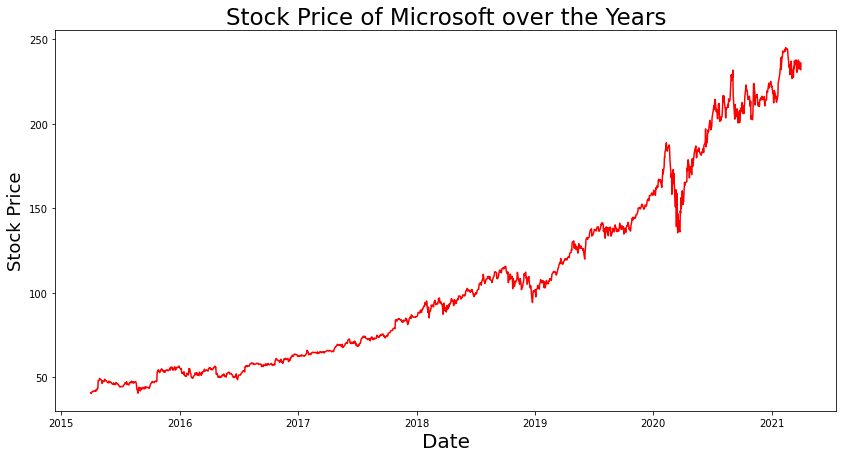

In [5]:
df['Date'] = pd.to_datetime(df.Date,format='%m/%d/%Y %H:%M:%S')
df.index = df['Date']
plt.figure(figsize=(14,7))
plt.plot(df['Close'], label='Close Price history',color='r')
plt.xlabel('Date',size=20)
plt.ylabel('Stock Price',size=18)
plt.title('Stock Price of Microsoft over the Years',size=23)

##Moving Average

In [6]:
def Moving_Average_Prediction(df):
    shape=df.shape[0]
    df_new=df[['Close']]
    df_new.head()
    train__data_set=df_new.iloc[:ceil(shape*0.75)]
    valid__data_set=df_new.iloc[ceil(shape*0.75):]
    print("***** Microsoft Stock Price Prediction Using Moving Averages*********")
    print('Shape of Training Data Set of Microsft Stock Prices',train__data_set.shape)
    print('Shape of Validating Data Set of Microsft Stock Prices',valid__data_set.shape)
    preds = []
    for i in range(0,valid__data_set.shape[0]):
        a = train__data_set['Close'][len(train__data_set)-valid__data_set.shape[0]+i:].sum() + sum(preds)
        b = a/(valid__data_set.shape[0])
        preds.append(b)
    RMS=np.sqrt(np.mean(np.power((np.array(valid__data_set['Close'])-preds),2)))
    print('(Root Mean Square Error) RMSE value on validation set:',RMS)
    valid__data_set['Predictions'] = preds
    plt.plot(train__data_set['Close'])
    plt.plot(valid__data_set[['Close', 'Predictions']])
    plt.xlabel('Date',size=18)
    plt.ylabel('Stock Price',size=18)
    plt.title('Stock Price Prediction by Moving Averages',size=18)
    plt.legend(['Model Training Data','Actual Data','Predicted Data'])

***** Microsoft Stock Price Prediction Using Moving Averages*********
Shape of Training Data Set of Microsft Stock Prices (1134, 1)
Shape of Validating Data Set of Microsft Stock Prices (377, 1)
(Root Mean Square Error) RMSE value on validation set: 76.62376749929759


<ipython-input-6-7d3455eec466>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid__data_set['Predictions'] = preds


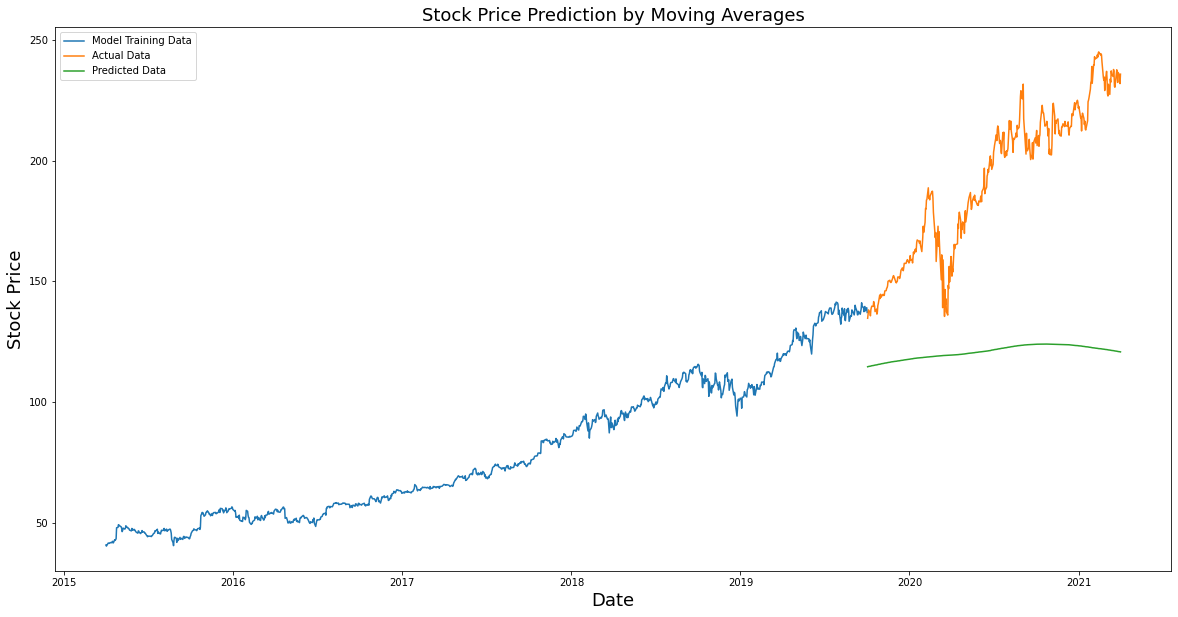

In [7]:
Moving_Average_Prediction(df)

# Linear Regression

In [8]:
def Linear_Regression_Prediction(df):
    Shape=df.shape[0]
    df_new=df[['Close']]
    df_new.head()
    train_data_set=df_new.iloc[:ceil(Shape*0.75)]
    valid_data_set=df_new.iloc[ceil(Shape*0.75):]
    print("**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******")
    print('Shape of Training dataset Set',train_data_set.shape)
    print('Shape of Validation dataset Set',valid_data_set.shape)
    train=train_data_set.reset_index()
    valid=valid_data_set.reset_index()
    x_train = train['Date'].map(dt.datetime.toordinal)
    y_train = train[['Close']]
    x_valid = valid['Date'].map(dt.datetime.toordinal)
    y_valid = valid[['Close']]
    #implement linear regression
    Model = LinearRegression()
    Model.fit(np.array(x_train).reshape(-1,1),y_train)
    preds = Model.predict(np.array(x_valid).reshape(-1,1))
    RMS=np.sqrt(np.mean(np.power((np.array(valid_data_set['Close'])-preds),2)))
    print('(Root Mean Square Error)RMSE value on validation set:',RMS)
    valid_data_set['Predictions'] = preds
    plt.plot(train_data_set['Close'])
    plt.plot(valid_data_set[['Close', 'Predictions']])
    plt.xlabel('Date',size=18)
    plt.ylabel('Microsoft Stock Price',size=18)
    plt.title('Microsoft Stock Price Prediction by Linear Regression',size=18)
    plt.legend(['Model Training Data','Actual Data','Predicted Data'])



**********STOCK PRICE PREDICTION BY LINEAR REGRESSION******
Shape of Training dataset Set (1134, 1)
Shape of Validation dataset Set (377, 1)
(Root Mean Square Error)RMSE value on validation set: 58.36609230803357


<ipython-input-8-f18b578748bd>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


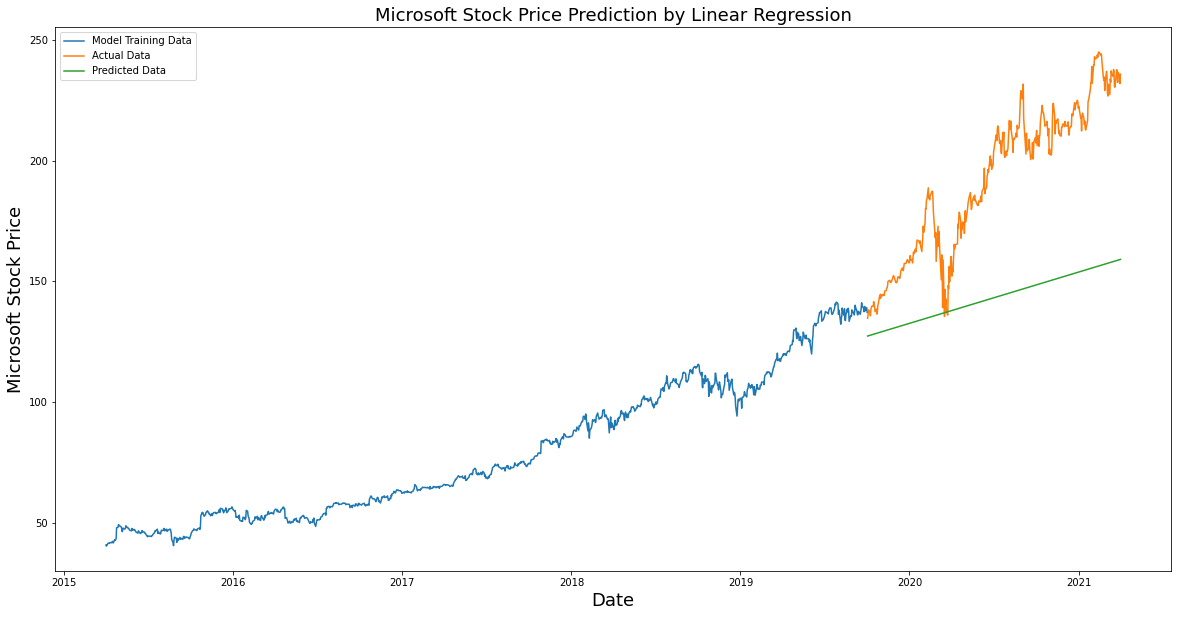

In [9]:
Linear_Regression_Prediction(df)

# K-Nearest Neighbours

In [10]:
def K_Nearest_Neighbours_Predict(df):
    shape=df.shape[0]
    df_new=df[['Close']]
    df_new.head()
    train_data_set=df_new.iloc[:ceil(shape*0.75)]
    valid_data_set=df_new.iloc[ceil(shape*0.75):]
    print("*********Microsoft STOCK PRICE PREDICTION BY K-NEAREST NEIGHBORS*********")
    print('Shape of Training Data Set',train_data_set.shape)
    print('Shape of Validation Data Set',valid_data_set.shape)
    train=train_data_set.reset_index()
    valid=valid_data_set.reset_index()
    x_train = train['Date'].map(dt.datetime.toordinal)
    y_train = train[['Close']]
    x_valid = valid['Date'].map(dt.datetime.toordinal)
    y_valid = valid[['Close']]
    x_train_scaled = scaler.fit_transform(np.array(x_train).reshape(-1, 1))
    x_train = pd.DataFrame(x_train_scaled)
    x_valid_scaled = scaler.fit_transform(np.array(x_valid).reshape(-1, 1))
    x_valid = pd.DataFrame(x_valid_scaled)
    params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
    knn = neighbors.KNeighborsRegressor()
    model = GridSearchCV(knn, params, cv=5)
    model.fit(x_train,y_train)
    preds = model.predict(x_valid)
    RMS=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
    print('(Root Mean Square Error) RMSE value on validation set:',RMS)
    valid_data_set['Predictions'] = preds
    plt.plot(train_data_set['Close'])
    plt.plot(valid_data_set[['Close', 'Predictions']])
    plt.xlabel('Date',size=18)
    plt.ylabel('Microsft Stock Price',size=18)
    plt.title('Microsoft Stock Price Prediction by K-Nearest Neighbors',size=18)
    plt.legend(['Model Training Data','Actual Data','Predicted Data'])

*********Microsoft STOCK PRICE PREDICTION BY K-NEAREST NEIGHBORS*********
Shape of Training Data Set (1134, 1)
Shape of Validation Data Set (377, 1)
(Root Mean Square Error) RMSE value on validation set: 112.9467566922719


<ipython-input-10-2b1b03705792>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data_set['Predictions'] = preds


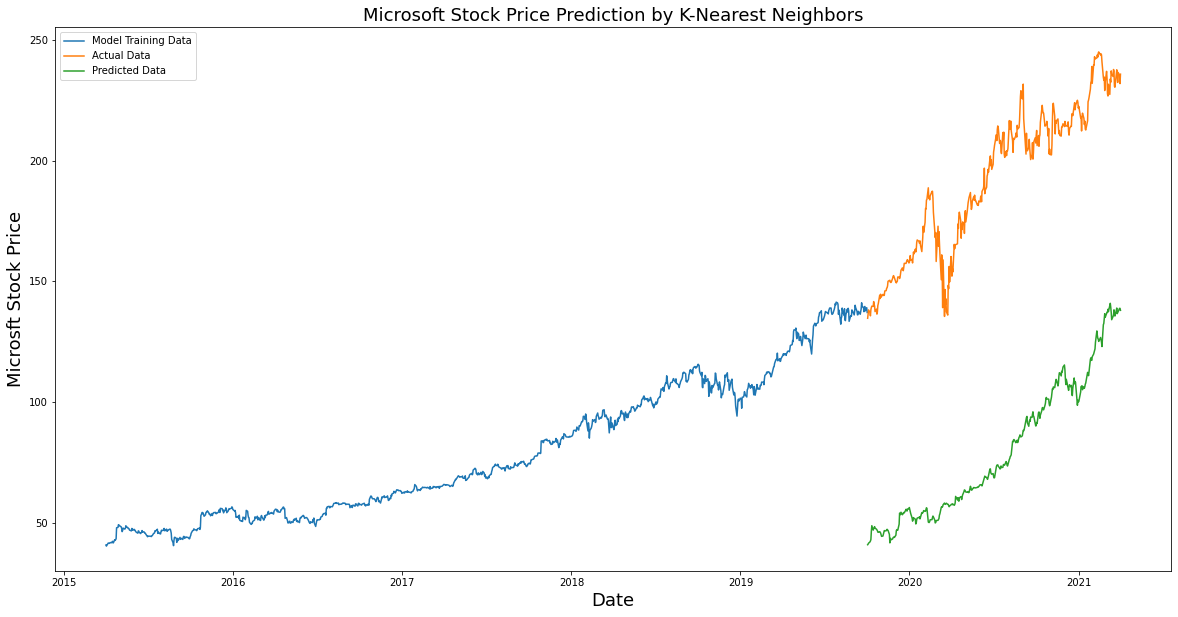

In [11]:
K_Nearest_Neighbours_Predict(df)

# Long Short Term Memory (LSTM)



In [12]:
def LSTM_Prediction(df):
    shape=df.shape[0]
    df_new=df[['Close']]
    df_new.head()
    dataset = df_new.values
    train=df_new[:ceil(shape*0.75)]
    valid=df_new[ceil(shape*0.75):]
    print("******** Microsoft STOCK PRICE PREDICTION BY LONG SHORT TERM MEMORY (LSTM) *******")
    print('Shape of Training data Set',train.shape)
    print('Shape of Validation data Set',valid.shape)
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(dataset)
    X_train, Y_train = [], []
    for i in range(40,len(train)):
        X_train.append(scaled_data[i-40:i,0])
        Y_train.append(scaled_data[i,0])
    X_train, Y_train = np.array(X_train), np.array(Y_train)
    Y_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
    Model = Sequential()
    Model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
    Model.add(LSTM(units=50))
    Model.add(Dense(1))
    Model.compile(loss='mean_squared_error', optimizer='adam')
    Model.fit(X_train, Y_train, epochs=1, batch_size=1, verbose=2)
    inputs = df_new[len(df_new) - len(valid) - 40:].values
    inputs = inputs.reshape(-1,1)
    inputs  = scaler.transform(inputs)
    X_test = []
    for i in range(40,inputs.shape[0]):
        X_test.append(inputs[i-40:i,0])
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
    closing_price = Model.predict(X_test)
    closing_price = scaler.inverse_transform(closing_price)
    RMS=np.sqrt(np.mean(np.power((valid-closing_price),2)))
    print('(Root Neab Square Error) RMSE value on validation set:',RMS)
    valid['Predictions'] = closing_price
    plt.plot(train['Close'])
    plt.plot(valid[['Close','Predictions']])
    plt.xlabel('Date',size=20)
    plt.ylabel('Stock Price',size=20)
    plt.title('Microsoft Stock Price Prediction by Long Short Term Memory (LSTM)',size=20)
    plt.legend(['Model Training Data','Actual Data','Predicted Data'])



******** Microsoft STOCK PRICE PREDICTION BY LONG SHORT TERM MEMORY (LSTM) *******
Shape of Training data Set (1134, 1)
Shape of Validation data Set (377, 1)
1094/1094 - 17s - loss: 6.1083e-04 - 17s/epoch - 15ms/step
12/12 [==============================] - 1s 5ms/step
(Root Neab Square Error) RMSE value on validation set: Close    11.222516
dtype: float64


<ipython-input-12-21b408202f74>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = closing_price


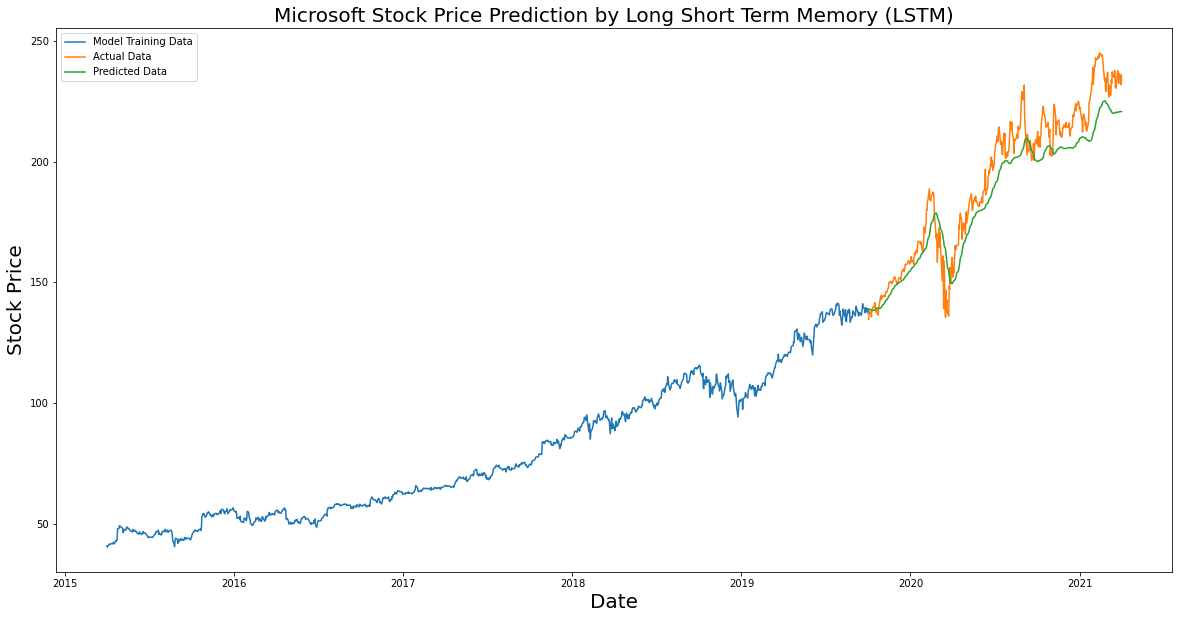

In [13]:
LSTM_Prediction(df)